![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


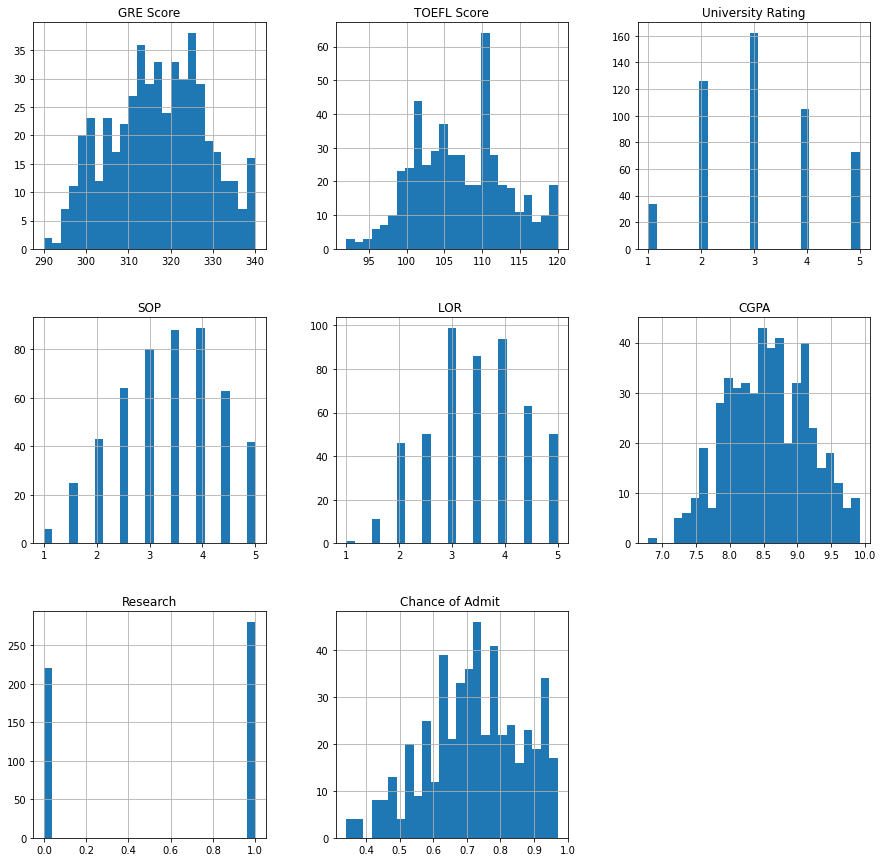

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [5]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1,0.87
497,337,117,5,5.0,5.0,9.87,1,0.96
498,330,120,5,4.5,5.0,9.56,1,0.93


In [6]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [7]:
Y= [[i]for i in Y]

In [8]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=22)

In [9]:
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [10]:
# Definición de dimensiones de salida, varaibles de interés
output_var = Y_train.shape[1]
print(output_var, ' output variables')

1  output variables


In [11]:
# Definición de dimensiones de entrada, varaibles predictoras
dims = X_train.shape[1]
print(dims, 'input variables')

7 input variables


## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [12]:
# Celda 1
# Importación librerías
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts

In [13]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

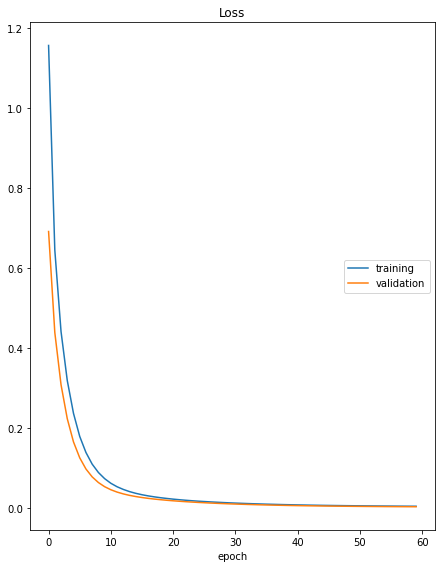

Loss
	training         	 (min:    0.005, max:    1.156, cur:    0.005)
	validation       	 (min:    0.004, max:    0.691, cur:    0.004)
11/11 [==============================] - 1s 51ms/step - loss: 0.0051 - val_loss: 0.0039


In [15]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=60, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

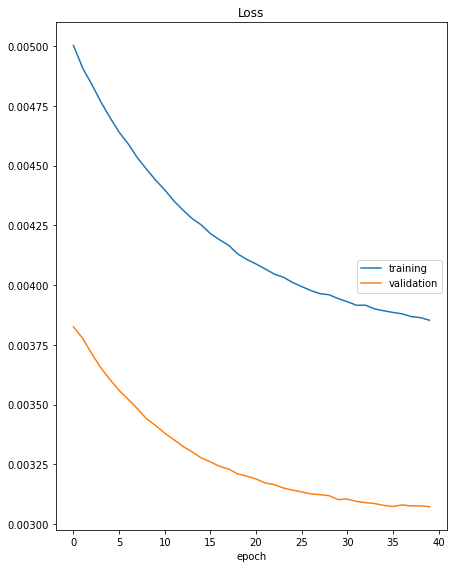

Loss
	training         	 (min:    0.004, max:    0.005, cur:    0.004)
	validation       	 (min:    0.003, max:    0.004, cur:    0.003)
11/11 [==============================] - 0s 22ms/step - loss: 0.0039 - val_loss: 0.0031


In [16]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=40, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Realizar predicciones en el conjunto de prueba
y_pred_1 = model.predict(X_test)

# Calcular MSE y MAE
mse = mean_squared_error(Y_test, y_pred_1)
mae = mean_absolute_error(Y_test, y_pred_1)

# Imprimir resultados
print('MSE:', mse)
print('MAE:', mae)

5/5 [==============================] - 0s 1ms/step
MSE: 0.0030727274304568814
MAE: 0.04119355477492015


In [32]:
y_pred

array([[0.        ],
       [0.        ],
       [0.00494019],
       [0.22942281],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.23728484],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.02305309],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.07617393],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.06120887],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.02847078],
       [0.0406777 ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.16305819],
       [0.08761434],
       [0.        ],
       [0.   

### Análisis:
Por medio de la gráfica que ilustra la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, escogemos como parámetro de la función model.fit() 60 épocas para validar gráficamente a partir de qué epoca no hay una mejora significativa en la función de pérdida. Como se observa en la gráfica de arriba, se evidencia que a partir de la época 20 se estabiliza la pérdida tanto en entrenamiento como validación. Por lo que en los puntos posteriores cuando usemos early stopping, usaremos una detención a partir de la época 20. Así mismo, este modelo arroja una MSE de 0.00325 y un MAE de 0.0434.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [18]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
X_numpy = X.values
Y_numpy = np.array(Y)

def create_model(neurons=1):
    # Crear modelo
    model = Sequential()
    model.add(Dense(neurons, input_dim=dims, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Crear un wrapper para el modelo de Keras
model = KerasRegressor(build_fn=create_model, epochs=60, batch_size=10, verbose=0)

# Definir los valores a probar para el hiperparámetro neurons
neurons = [1, 10, 50, 100, 150, 300]
param_grid = dict(neurons=neurons)

# Crear y ajustar el objeto GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_numpy, Y_numpy)

# Imprimir resultados
print("Mejor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))

Mejor: -0.020329 usando {'neurons': 1}


In [19]:
# Celda 2
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(50, input_shape=(dims,),activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                400       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

In [21]:
# Separación de datos de entrenamiento para considerar un set de validación durante entrenamiento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

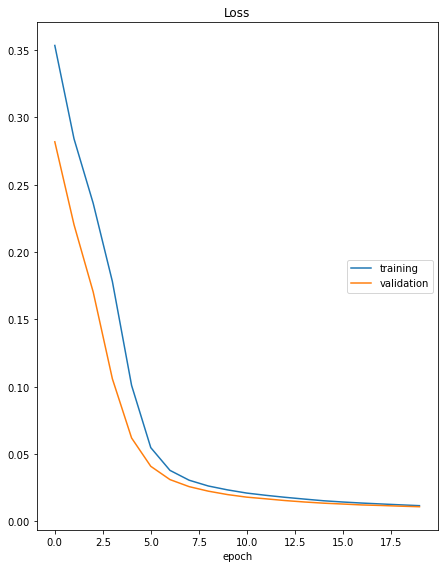

Loss
	training         	 (min:    0.012, max:    0.353, cur:    0.012)
	validation       	 (min:    0.011, max:    0.282, cur:    0.011)
10/10 [==============================] - 0s 24ms/step - loss: 0.0117 - val_loss: 0.0109


In [22]:
# Entrenamiento de la red neuronal con 20 épocas
model.fit(X_train, Y_train,
          validation_data = (X_val, Y_val),
          epochs=20, 
          callbacks=[PlotLossesKeras()])

In [23]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular MSE y MAE
mse_2 = mean_squared_error(Y_test, y_pred)
mae_2 = mean_absolute_error(Y_test, y_pred)

# Imprimir resultados
print('MSE:', mse_2)
print('MAE:', mae_2)

5/5 [==============================] - 0s 2ms/step
MSE: 0.013184771551294858
MAE: 0.09676985401312509


### Análisis:
Por medio de la función GridSearchCV encontramos el número óptimo de neuronas a utilizar en nuestro modelo multicapa en un rango entre 1 a 300 neuronas. El método sugiere que el modelo con mejor score con base en este algoritmo es el que usa 50 neuronas. De esta manera, nos disponemos a ejecutar el modelo multicapa usando 50 neuronas y 20 épocas, tal como lo sugería el análisis del punto anterior. Con base en esta selección, encontramos que el modelo estabiliza su MSE a partir de la época 20, y arroja un MSE y un MAE de 0.012 y 0.085 respectivamente.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [24]:
# Celda 3
# Importación librerías
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dropout

In [25]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

def create_model(dropout_rate=0.0):
    # Crear modelo
    model = Sequential()
    model.add(Dense(50, input_dim=dims, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='sgd')
    return model

# Crear un wrapper para el modelo de Keras
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

# Definir los valores a probar para el hiperparámetro dropout_rate
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
param_grid = dict(dropout_rate=dropout_rate)

# Crear y ajustar el objeto GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_numpy, Y_numpy)

# Imprimir resultados
print("Mejor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))


Mejor: -0.020436 usando {'dropout_rate': 0.0}


In [26]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(50, input_shape=(dims,),activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                400       
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 3,001
Trainable params: 3,001
Non-trainabl

In [27]:
# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

In [28]:
# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

In [29]:
# Entrenamiento de la red neuronal con 50 épocas y early stopping
model.fit(X_train, Y_train, 
          verbose=True, 
          epochs=20, 
          batch_size=128,
          validation_data=(X_test,Y_test),
          callbacks=[best_model, early_stop])

Epoch 1/20
3/3 [==============================] - 1s 119ms/step - loss: 0.5401 - val_loss: 0.5258
Epoch 2/20
3/3 [==============================] - 0s 24ms/step - loss: 0.5372 - val_loss: 0.5258
Epoch 3/20
3/3 [==============================] - 0s 22ms/step - loss: 0.5383 - val_loss: 0.5257
Epoch 4/20
3/3 [==============================] - 0s 23ms/step - loss: 0.5399 - val_loss: 0.5256
Epoch 5/20
3/3 [==============================] - 0s 24ms/step - loss: 0.5346 - val_loss: 0.5255
Epoch 6/20
3/3 [==============================] - 0s 24ms/step - loss: 0.5374 - val_loss: 0.5254
Epoch 7/20
3/3 [==============================] - 0s 22ms/step - loss: 0.5351 - val_loss: 0.5253
Epoch 8/20
3/3 [==============================] - 0s 24ms/step - loss: 0.5352 - val_loss: 0.5250
Epoch 9/20
3/3 [==============================] - 0s 25ms/step - loss: 0.5364 - val_loss: 0.5248
Epoch 10/20
3/3 [==============================] - 0s 24ms/step - loss: 0.5356 - val_loss: 0.5245
Epoch 11/20
3/3 [===========

In [30]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular MSE y MAE
mse_3 = mean_squared_error(Y_test, y_pred)
mae_3 = mean_absolute_error(Y_test, y_pred)

# Imprimir resultados
print('MSE:', mse_3)
print('MAE:', mae_3)

5/5 [==============================] - 0s 2ms/step
MSE: 0.49414678279112784
MAE: 0.6828506446033716


### Análisis:
En el algoritmo anterior usamos la función GridSearchCV para identificar la tasa de dropout óptima para el modelo de red neuronal multicapa. El método nos sugiere emplear una tasa de dropout del 0.1. Una vez, ejecutamos el modelo multicapa usando los parámetros óptimos encontrados en los pasos anteriores (Épocas: 20, Neuronas: 50, Tasa Dropout: 0.1), el modelo nos arroja un MSE y MAE de 0.03 y 0.14 respectivamente. Es pertinente aclarar que en el número de parámetros entrenables en las capas que se observa en la tabla superior, en particular, las filas que corresponden a las capas dropout y dropout_1 muestran que ambas capas tienen 0 parámetros entrenables. Esto es correcto y esperable, ya que las capas Dropout no tienen parámetros entrenables. Su función es simplemente “apagar” aleatoriamente algunas neuronas durante el entrenamiento, lo que no requiere ningún parámetro adicional.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

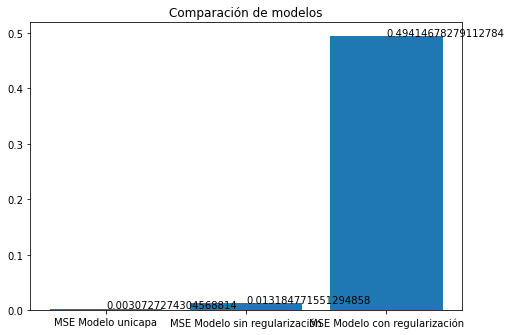

In [31]:
# Celda 4
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = [ 'MSE Modelo unicapa', 'MSE Modelo sin regularización', 'MSE Modelo con regularización']
ejeY = [ mse, mse_2, mse_3]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()